In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Manoj\\Desktop\\Edureka_Python')

In [132]:
dataset = pd.read_csv("SeaPlaneTravel.csv")
dataset.head()

,Month,#Passengers
0,2003-01,112
1,2003-02,118
2,2003-03,132
3,2003-04,129
4,2003-05,121


In [133]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [134]:
dataset.set_index('Month', inplace=True)

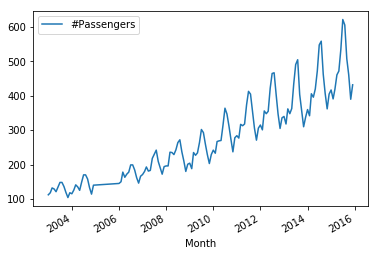

In [135]:
dataset.plot()

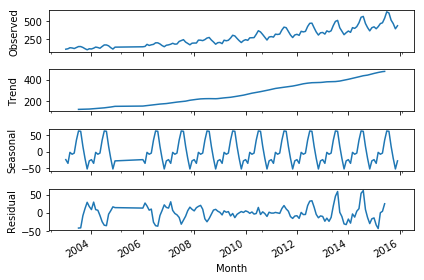

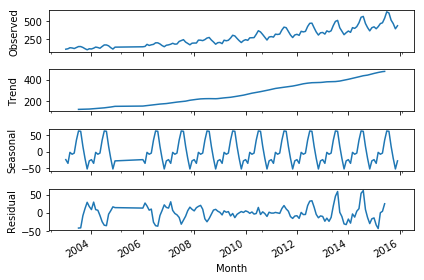

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['#Passengers'], freq=12)
decomposition.plot()



In [15]:
from statsmodels.tsa.stattools import adfuller

In [137]:
adfuller(dataset['#Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("ADF test")
    labels = {'ADF test statistic', 'P-value','#Lags', 'No. of Obs' }
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
        
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis and TS is stationary')
    else:
        print('Weak evidence against null hypothesis and TS is not stationary')

In [18]:
adf_check(data['#Passengers'])

ADF test
P-value:0.8153688792060543
#Lags:0.9918802434376411
No. of Obs:13
ADF test statistic:130
Weak evidence against null hypothesis and TS is not stationary


In [138]:


dataset['#Passengers_FirstDiff'] = dataset['#Passengers']-dataset['#Passengers'].shift(1)

In [139]:
dataset.head()

,#Passengers,#Passengers_FirstDiff
Month,,
2003-01-01,112,NaN
2003-02-01,118,6.0
2003-03-01,132,14.0
2003-04-01,129,-3.0
2003-05-01,121,-8.0


In [140]:
adf_check(dataset['#Passengers_FirstDiff'].dropna())

ADF test
P-value:-2.8292668241700034
#Lags:0.054213290283824954
No. of Obs:12
ADF test statistic:130
Weak evidence against null hypothesis and TS is not stationary


In [141]:
dataset['#Passengers_SecondDiff']= dataset['#Passengers_FirstDiff']-dataset['#Passengers_FirstDiff'].shift(1)

In [142]:
dataset.head()

,#Passengers,#Passengers_FirstDiff,#Passengers_SecondDiff
Month,,,
2003-01-01,112,NaN,NaN
2003-02-01,118,6.0,NaN
2003-03-01,132,14.0,8.0
2003-04-01,129,-3.0,-17.0
2003-05-01,121,-8.0,-5.0


In [144]:
adf_check(dataset['#Passengers_SecondDiff'].dropna())

ADF test
P-value:-16.384231542468488
#Lags:2.7328918500143186e-29
No. of Obs:11
ADF test statistic:130
Strong evidence against null hypothesis and TS is stationary


In [145]:
dataset['Seasonal_diff']= dataset['#Passengers']-dataset['#Passengers'].shift(12)

In [147]:
dataset

,#Passengers,#Passengers_FirstDiff,#Passengers_SecondDiff,Seasonal_diff
Month,,,,
2003-01-01,112,NaN,NaN,NaN
2003-02-01,118,6.0,NaN,NaN
2003-03-01,132,14.0,8.0,NaN
2003-04-01,129,-3.0,-17.0,NaN
2003-05-01,121,-8.0,-5.0,NaN
2003-06-01,135,14.0,22.0,NaN
2003-07-01,148,13.0,-1.0,NaN
2003-08-01,148,0.0,-13.0,NaN
2003-09-01,136,-12.0,-12.0,NaN


In [148]:
adf_check(dataset['Seasonal_diff'].dropna())

ADF test
P-value:-3.3830207264924805
#Lags:0.011551493085514982
No. of Obs:1
ADF test statistic:130
Strong evidence against null hypothesis and TS is stationary


In [149]:
#d=2
#D=1

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

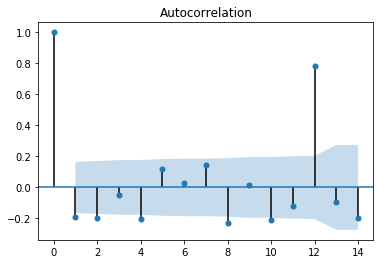

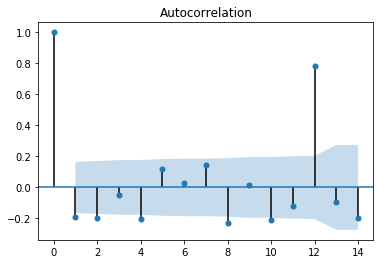

In [150]:

#q=0

plot_acf(dataset['#Passengers_SecondDiff'].dropna(), lags=14)

In [151]:

#p=0

plot_pacf(dataset['#Passengers_SecondDiff']dropna(), lags=14)

SyntaxError: invalid syntax (<ipython-input-151-c422b0960d8b>, line 4)

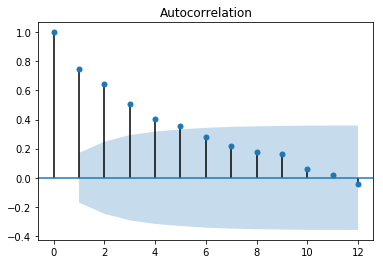

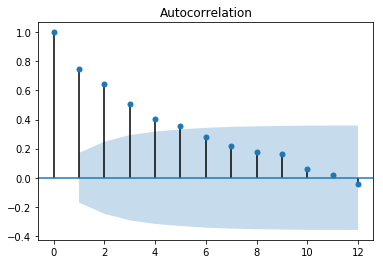

In [152]:

#Q=5

plot_acf(dataset['Seasonal_diff'].dropna(), lags=12)

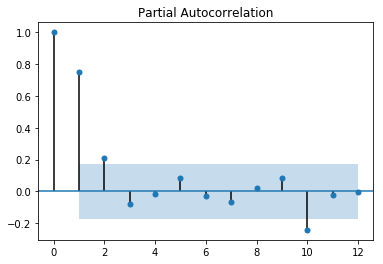

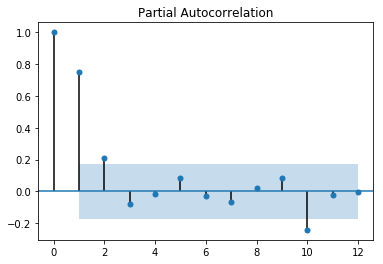

In [154]:

#P=2

plot_pacf(dataset['Seasonal_diff'].dropna(), lags=12)

In [155]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [156]:

model = sm.tsa.statespace.SARIMAX(dataset['#Passengers'], order=(0,2,0), seasonal_order=(1,2,1,12))
results = model.fit()
print(results.summary())

C:\Users\Manoj\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 2, 1, 12)   Log Likelihood                -536.009
Date:                            Thu, 25 Jul 2019   AIC                           1078.018
Time:                                    16:22:38   BIC                           1086.330
Sample:                                         0   HQIC                          1081.393
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1960      0.139     -1.413      0.158      -0.468       0.076
ma.S.L12      -0.9984     21.002   

In [168]:
dataset.head()

,#Passengers,#Passengers_FirstDiff,#Passengers_SecondDiff,Seasonal_diff,forecast,rownum
Month,,,,,,
2003-01-01,112,NaN,NaN,NaN,NaN,0
2003-02-01,118,6.0,NaN,NaN,NaN,1
2003-03-01,132,14.0,8.0,NaN,NaN,2
2003-04-01,129,-3.0,-17.0,NaN,NaN,3
2003-05-01,121,-8.0,-5.0,NaN,NaN,4


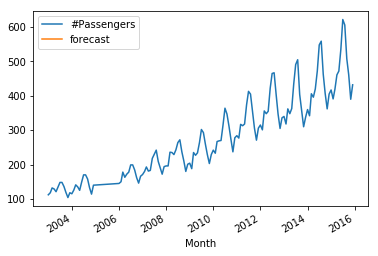

In [173]:
dataset['rownum'] = np.arange(len(dataset))

dataset['forecast'] = results.predict(start=130, end=144, dynamic=False)
dataset[['#Passengers', 'forecast']].plot()

In [166]:
dataset.tail()

,#Passengers,#Passengers_FirstDiff,#Passengers_SecondDiff,Seasonal_diff,forecast,rownum
Month,,,,,,
2015-08-01,606,-16.0,-103.0,47.0,NaN,139
2015-09-01,508,-98.0,-82.0,45.0,NaN,140
2015-10-01,461,-47.0,51.0,54.0,NaN,141
2015-11-01,390,-71.0,-24.0,28.0,NaN,142
2015-12-01,432,42.0,113.0,27.0,NaN,143


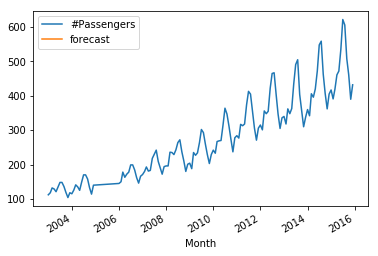

In [177]:
dataset[['#Passengers','forecast']].plot()

In [129]:
from pandas.tseries.offsets import DateOffset

In [178]:
future_dates = [dataset.index[-1] + DateOffset(months=x) for x in range(0,48)]

In [179]:
future_dates

[Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-01-01 00:00:00'),
 Timestamp('2016-02-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-04-01 00:00:00'),
 Timestamp('2016-05-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2016-08-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-10-01 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2017-08-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-10-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-

In [180]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=dataset.columns)

In [181]:
future_df = pd.concat([dataset, future_dates_df])

In [182]:
future_df

,#Passengers,#Passengers_FirstDiff,#Passengers_SecondDiff,Seasonal_diff,forecast,rownum
2003-01-01,112,NaN,NaN,NaN,NaN,0
2003-02-01,118,6.0,NaN,NaN,NaN,1
2003-03-01,132,14.0,8.0,NaN,NaN,2
2003-04-01,129,-3.0,-17.0,NaN,NaN,3
2003-05-01,121,-8.0,-5.0,NaN,NaN,4
2003-06-01,135,14.0,22.0,NaN,NaN,5
2003-07-01,148,13.0,-1.0,NaN,NaN,6
2003-08-01,148,0.0,-13.0,NaN,NaN,7
2003-09-01,136,-12.0,-12.0,NaN,NaN,8
2003-10-01,119,-17.0,-5.0,NaN,NaN,9


C:\Users\Manoj\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


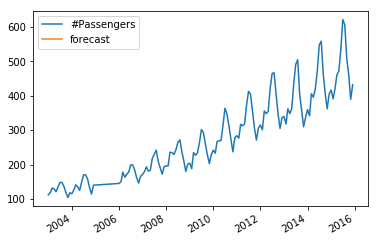

In [183]:
future_df['forecast'] = results.predict(start=145, end = 180, dynamic=True)
future_df[['#Passengers', 'forecast']].plot()